# Neural Network  (22AI511T)

## Name: Tanmay Rathod
## Enrollment: 23MAI007



# Back-Propagation

Predicted Output:
Input: [1 0], Actual: 1, Predicted Output: 0.7427365568260792 ~~ 1
Input: [0 1], Actual: 1, Predicted Output: 0.8296177932988902 ~~ 1
Input: [0 0], Actual: 0, Predicted Output: 0.10911920233843558 ~~ 0
Input: [1 1], Actual: 0, Predicted Output: 0.31577170923164066 ~~ 0


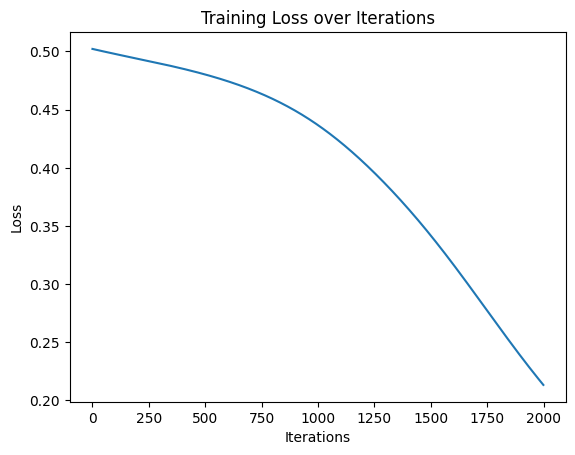

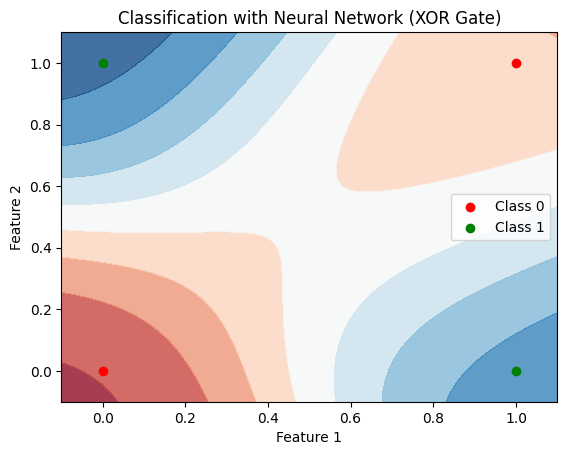

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
def step_function(x) :
    if x  > 0.5 :
        return 1 
    else :
        return 0
def forward(x, w1, w2, predict=False):
    a1 = np.dot(x, w1)
    z1 = sigmoid(a1)
    bias = np.ones((len(x), 1))
    z1 = np.concatenate((bias, z1), axis=1)
    a2 = np.dot(z1, w2)
    z2 = sigmoid(a2)
    if predict:
        return z2
    return a1, z1, a2, z2

def backprop(a2, X, z1, z2, y, w2, a1):
    delta2 = z2 - y
    Delta2 = np.dot(z1.T, delta2) 
    delta1 = (delta2.dot(w2[1:, :].T)) * sigmoid_derivative(a1)
    Delta1 = np.dot(X.T, delta1)
    return delta2, delta1, Delta1, Delta2

X = np.array([[1, 1, 0],
              [1, 0, 1],
              [1, 0, 0],
              [1, 1, 1]])

Y = np.array([1, 1, 0, 0]).reshape(-1, 1)
W1_WE = []
W2_WE = []
w1 = np.random.randn(3, 5)
w2 = np.random.randn(6, 1)

lr = 0.1
costs = []
epochs = 2000
m = len(X)

for i in range(epochs):
    a1, z1, a2, z2 = forward(X, w1, w2)
    delta2, delta1, Delta1, Delta2 = backprop(a2, X, z1, z2, Y, w2, a1)
    W1_WE.append(w1.copy())  
    W2_WE.append(w2.copy())
    w1 = w1 - lr * (1/m) * Delta1
    w2 = w2 - lr * (1/m) * Delta2
    c = np.mean(np.abs(delta2))
    costs.append(c)

predictions = forward(X, w1, w2, predict=True)
print("Predicted Output:")
for i in range(len(X)):
    print(f"Input: {X[i, 1:]}, Actual: {Y[i][0]}, Predicted Output: {predictions[i][0]} ~~ {step_function(predictions[i][0])}")
plt.plot(costs)
plt.title("Training Loss over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

x_min, x_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
y_min, y_max = X[:, 2].min() - 0.1, X[:, 2].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

grid_data = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]

Z = forward(grid_data, w1, w2, predict=True)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[Y.ravel() == 0, 1], X[Y.ravel() == 0, 2], color='red', label='Class 0')
plt.scatter(X[Y.ravel() == 1, 1], X[Y.ravel() == 1, 2], color='green', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification with Neural Network (XOR Gate)')
plt.legend()
plt.show()


In [14]:
print("Final weights for w1:")
print(w1)
print("\nFinal weights for w2:")
print(w2)

for i in range(epochs):
    a1, z1, a2, z2 = forward(X, w1, w2)
    delta2, delta1, Delta1, Delta2 = backprop(a2, X, z1, z2, Y, w2, a1)
    w1 = w1 - lr * (1/m) * Delta1
    w2 = w2 - lr * (1/m) * Delta2

print("\nDelta values:")
print("Delta2:")
print(delta2)
print("\nDelta1:")
print(delta1)


Final weights for w1:
[[-0.7719786  -1.06872307  0.58092025 -1.16993049 -1.33351943]
 [ 3.99620114 -0.45337276 -1.63226734 -1.69568236 -3.98596408]
 [ 3.43489435  0.42070325  3.10199817  0.86284607  2.5147209 ]]

Final weights for w2:
[[-2.12135769]
 [ 4.2332644 ]
 [-0.22921761]
 [-3.56937446]
 [ 1.06821446]
 [ 3.73097225]]

Delta values:
Delta2:
[[-0.05306363]
 [-0.03766057]
 [ 0.01583502]
 [ 0.07078051]]

Delta1:
[[-0.0069812   0.00242126  0.03424581 -0.00314997 -0.00028261]
 [-0.0076195   0.00248091  0.00044353 -0.0177309  -0.02437235]
 [ 0.01669248 -0.0008502  -0.02079089  0.00595652  0.01373086]
 [ 0.00012767 -0.0042446  -0.01921729  0.01261313  0.0140683 ]]
